In [2]:
import pandas as pd

df = pd.read_excel('STT_LAB2_BUG_MINING.xlsx')
print(df.head(1))


       Hash                          Message      Filename  \
0  a1b2c3d4  fix null pointer in user lookup  auth/user.py   

                                Source Code (before)  \
0  def get_user_details(user_id):\n  user = db.qu...   

                               Source Code (current)  \
0  def get_user_details(user_id):\n  user = db.qu...   

                                                Diff LLM Inference (fix type)  \
0  -  return user.name\n+  if user:\n+    return ...              Logic Error   

                                   Rectified Message  
0  Fix: Prevent AttributeError by handling None f...  


In [3]:
print("--- Baseline Descriptive Statistics ---")


--- Baseline Descriptive Statistics ---


In [4]:
total_commits = df['Hash'].nunique()
total_files = df['Filename'].nunique()
print("Q1: Total number of commits and files.")

print(f"\nTotal number of unique commits: {total_commits}")
print(f"Total number of unique files: {total_files}")

Q1: Total number of commits and files.

Total number of unique commits: 29
Total number of unique files: 29


In [5]:
files_per_commit = df.groupby('Hash')['Filename'].count()
avg_files_per_commit = files_per_commit.mean()
print("Q2: Average number of modified files per commit.")
print(f"\nAverage number of modified files per commit: {avg_files_per_commit:.2f}")

Q2: Average number of modified files per commit.

Average number of modified files per commit: 1.00


Q3: Distribution of fix types from LLM Inference (fix type).

Distribution of fix types:


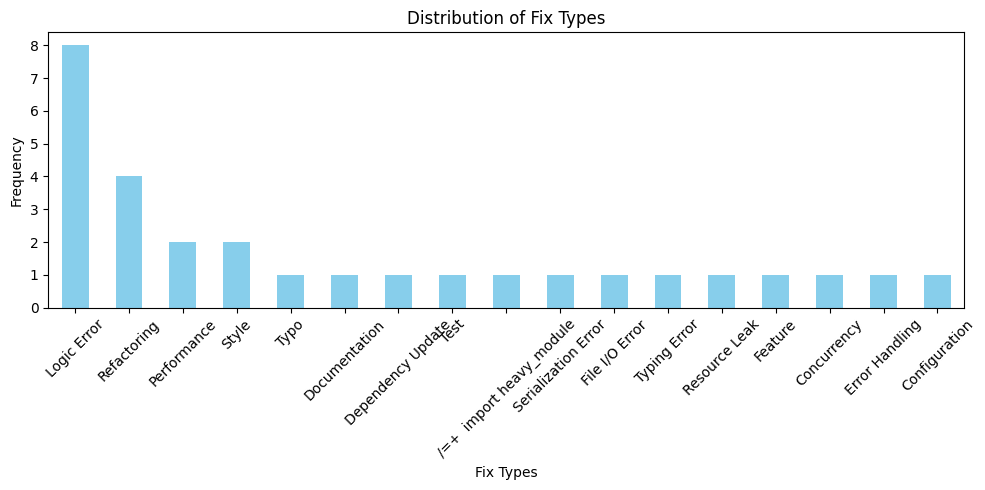

In [9]:
fix_type_distribution = df['LLM Inference (fix type)'].value_counts()

print("Q3: Distribution of fix types from LLM Inference (fix type).")
print("\nDistribution of fix types:")
# plot graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
fix_type_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Fix Types")
plt.xlabel("Fix Types")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
top_modified_files = df['Filename'].value_counts().head(5) # Get top 5

print("Q4: Most frequently modified filenames/extensions.")
print("\nTop 5 most frequently modified files:")
print(top_modified_files)


Q4: Most frequently modified filenames/extensions.

Top 5 most frequently modified files:
Filename
auth/user.py                  1
data_processing/cleaner.py    1
api/v1/errors.js              1
utils/pagination.py           1
services/payment.js           1
Name: count, dtype: int64


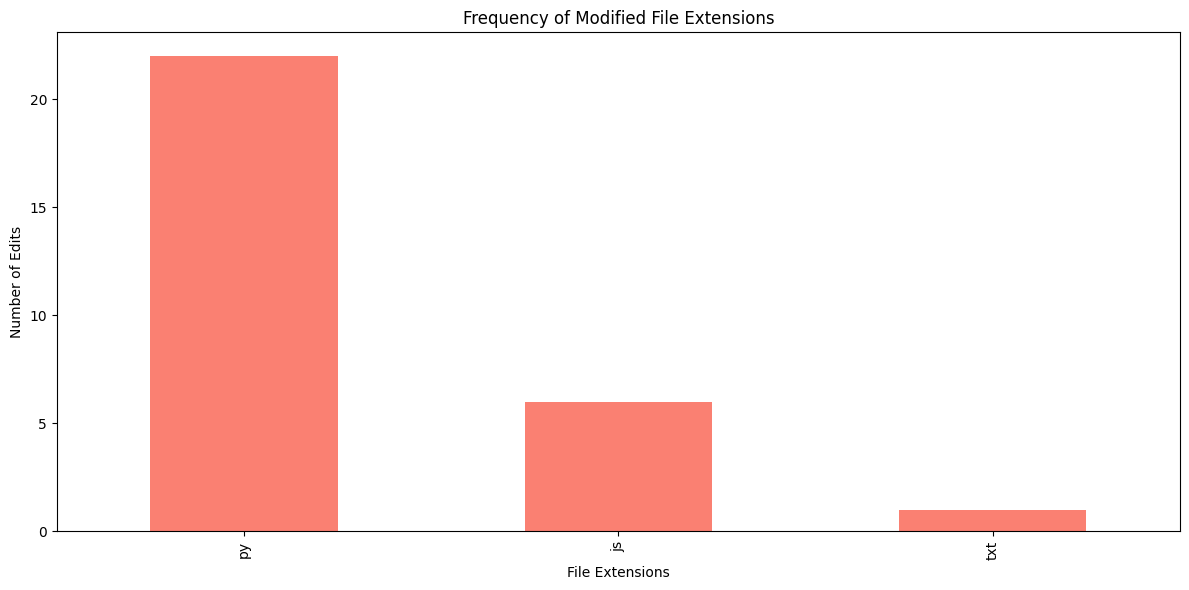

In [14]:
df['Extension'] = df['Filename'].str.split('.').str[-1]
top_extensions = df['Extension'].value_counts()

plt.figure(figsize=(12, 6))

top_extensions.plot(kind='bar', color='salmon')
plt.title("Frequency of Modified File Extensions")
plt.xlabel("File Extensions")
plt.ylabel("Number of Edits")

plt.tight_layout()
plt.show()